In [1]:
import pandas as pd

In [2]:
imbalance = pd.read_csv('/content/imbalanced_data.csv')

In [3]:
imbalance.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
#EDA

import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='label', ylabel='count'>

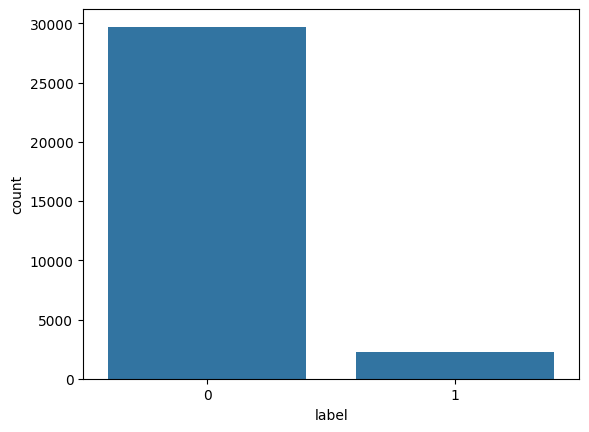

In [5]:
sns.countplot(x='label', data=imbalance)


0 no hate,

1 hate

In [6]:
imbalance.shape

(31962, 3)

In [7]:
imbalance.isnull().sum()

,0
id,0
label,0
tweet,0


In [8]:
imbalance.drop('id',axis=1, inplace=True)

In [9]:
raw_data = pd.read_csv('/content/raw_data.csv')

In [10]:
raw_data.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace =True)

<Axes: xlabel='class', ylabel='count'>

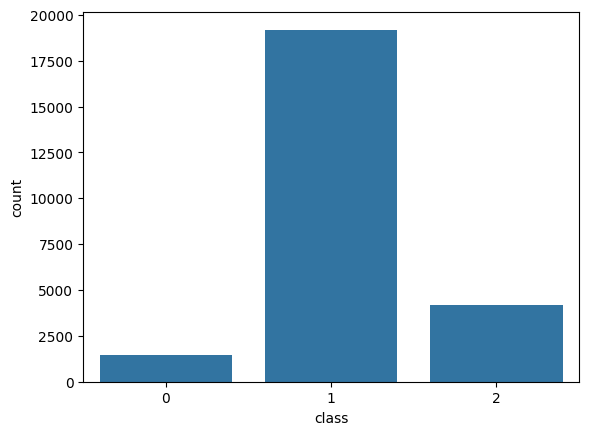

In [11]:
sns.countplot(x='class',data =raw_data)

0 hate

1 abusive

2 nohate

In [12]:
#copying class 1 and 0
raw_data[raw_data['class'] == 0][ 'class'] = 1

<ipython-input-12-11f9c3d60099>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data['class'] == 0][ 'class'] = 1


In [13]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
raw_data[raw_data['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [15]:
# replace the value of 0 to 1
raw_data["class"].replace({0:1},inplace=True)

<ipython-input-15-f7cf732ce13e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data["class"].replace({0:1},inplace=True)


<Axes: xlabel='class', ylabel='count'>

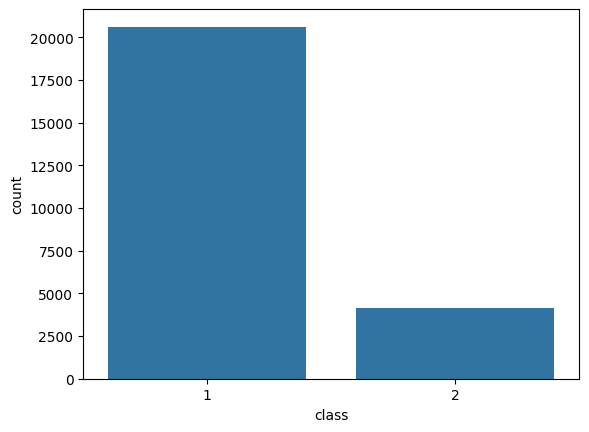

In [16]:
sns.countplot(x="class",data= raw_data)

In [17]:
raw_data["class"].replace({2:0}, inplace = True)

<ipython-input-17-789807470b50>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data["class"].replace({2:0}, inplace = True)


In [18]:
# Let's change the name of the 'class' to label
raw_data.rename(columns={'class':'label'},inplace =True)

In [19]:
imbalance.shape

(31962, 2)

In [20]:
df = pd.concat([raw_data, imbalance], axis=0)

In [21]:
df.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [22]:
df.shape

(56745, 2)

<Axes: xlabel='label', ylabel='count'>

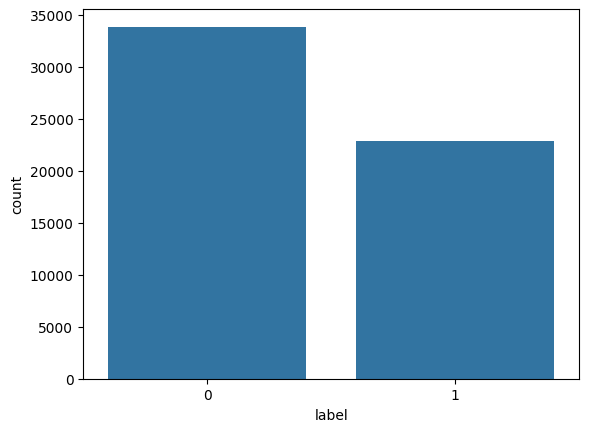

In [23]:
sns.countplot(x='label',data=df)

## Preprocessing

In [24]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [26]:
# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('\[.*?\]', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [27]:
df['tweet'][1]

,tweet
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
1,@user @user thanks for #lyft credit i can't us...


In [28]:
df['tweet']=df['tweet'].apply(lambda x:data_cleaning(x))

In [29]:
df['tweet'][1]

,tweet
1,rt boy dats coldtyga dwn bad for cuffin dat ...
1,user user thanks for lyft credit i cant use ca...


In [30]:
x = df['tweet']
y = df['label']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Let's split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

42558 42558
14187 14187


##Feature engineering


In [33]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [34]:
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [35]:
sequences_matrix


array([[    0,     0,     0, ...,   112,    23, 38414],
       [    0,     0,     0, ...,  6280, 20408,  1086],
       [    0,     0,     0, ...,    14,    72,   701],
       ...,
       [    0,     0,     0, ...,  1315,  3027, 16270],
       [   17,   631,     9, ...,  1533,     4,   343],
       [   15,   121,   116, ...,     2,    17,  5035]], dtype=int32)

In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop

In [37]:
# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [39]:
# starting model training
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1,validation_split=0.2)


266/266 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.8215 - loss: 0.3973 - val_accuracy: 0.9360 - val_loss: 0.1922


In [40]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [41]:
test_sequences_matrix

array([[ 899,    2,    1, ...,    1,  560,   80],
       [  91,  347, 2563, ...,  669,  178,  665],
       [   3,   10,  434, ...,   62,   42, 1178],
       ...,
       [   0,    0,    0, ...,  499,  344,  171],
       [   0,    0,    0, ...,   28,  114,  399],
       [   0,    0,    0, ...,    2,  747, 1783]], dtype=int32)

In [42]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

444/444 ━━━━━━━━━━━━━━━━━━━━ 78s 176ms/step - accuracy: 0.9338 - loss: 0.1895


In [43]:
lstm_prediction = model.predict(test_sequences_matrix)

444/444 ━━━━━━━━━━━━━━━━━━━━ 78s 175ms/step


In [44]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)


In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
print(confusion_matrix(y_test,res))

[[8227  256]
 [ 710 4994]]


In [47]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [48]:
# Let's save the mdoel.
model.save("model.h5")

In [49]:
import keras
load_model=keras.models.load_model("model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [52]:
# Let's test our model on custom data.
test = 'i hate you'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")



i hate you
i hate you
['hate']
[[134]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
pred [[0.3250717]]
no hate
